In [8]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
sys.path.append('../') # Add parent directory to the system path

In [9]:
from direct_decomposition import direct_decomposition

In [10]:
HOM = 1/np.sqrt(2) * np.matrix([[1,1],[1,-1]])
interferom = direct_decomposition(HOM, 2)
print(interferom.depth())

197


In [11]:
# Initial state for HOM simulation
HOM_circuit = QuantumCircuit(4)
HOM_circuit.x(0)
HOM_circuit.x(2)
print(HOM_circuit)

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          


In [12]:
HOM_circuit.compose(interferom, qubits=list(range(4)), inplace=True)
HOM_circuit.measure_all()

{'1000': 499980, '0010': 500020}


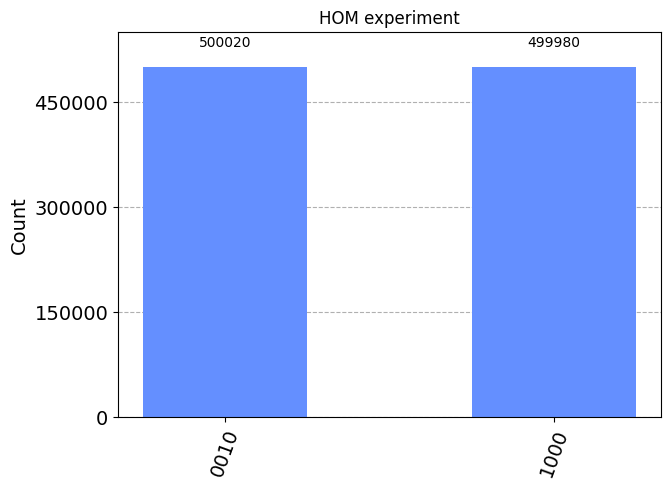

In [13]:
num_shots = 1e6
simulator = AerSimulator()
HOM_circuit = transpile(HOM_circuit, simulator)
result = simulator.run(HOM_circuit, shots=num_shots).result()
counts = result.get_counts(HOM_circuit)
print(counts)
plot_histogram(counts, title='HOM experiment')